# Vykreslovanie grafov

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Funkcia plot nad dataframom
[Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) na dokumentáciu

<AxesSubplot:>

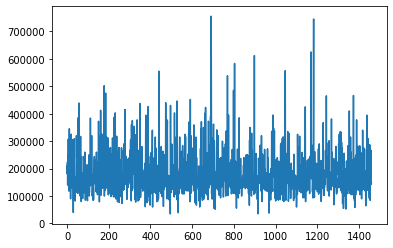

In [4]:
df.SalePrice.plot()

<AxesSubplot:>

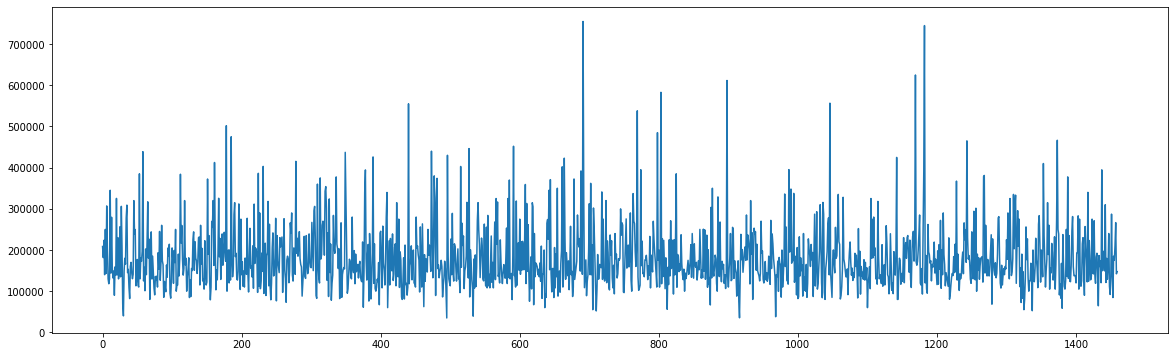

In [19]:
# figsize in inches
df.SalePrice.plot(figsize=(20,6))

# Parameter kind
- ‘line‘: line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot
- ‘hexbin’ : hexbin plot.

<AxesSubplot:title={'center':'Rozlozenie hodnot'}, ylabel='Frequency'>

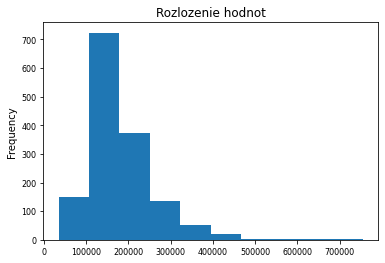

In [5]:
df.SalePrice.plot(kind="hist", title="Rozlozenie hodnot", fontsize=8)

<AxesSubplot:>

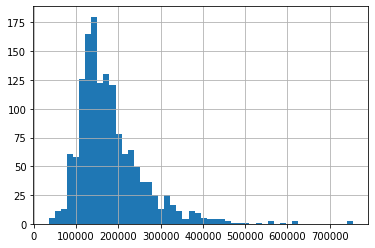

In [7]:
df.SalePrice.hist(bins=50)

# Agregated plots

In [6]:
df[["LotFrontage", "LotArea"]].head()

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260


<AxesSubplot:>

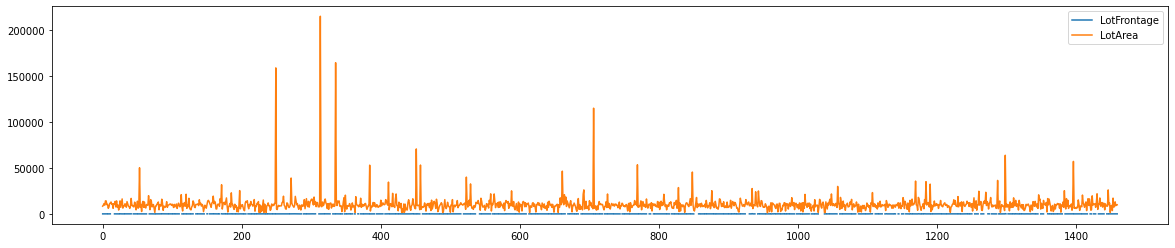

In [26]:
df[["LotFrontage", "LotArea"]].plot(figsize=(20, 4))

In [7]:
df.groupby('MSZoning').mean()["SalePrice"]

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='MSZoning'>

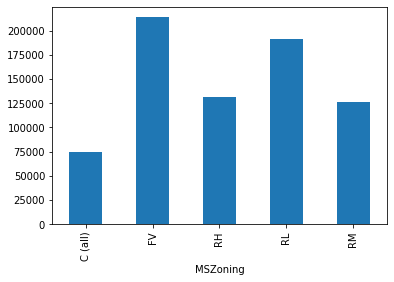

In [31]:
df.groupby('MSZoning').mean()["SalePrice"].plot(kind="bar")

In [8]:
df.groupby('MSZoning')[["YearBuilt", "YrSold"]].mean()

,YearBuilt,YrSold
MSZoning,,
C (all),1924.100000,2008.300000
FV,2004.507692,2007.846154
RH,1945.687500,2007.500000
RL,1975.461338,2007.824500
RM,1943.256881,2007.761468


<AxesSubplot:xlabel='MSZoning'>

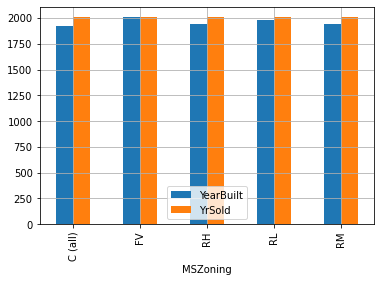

In [45]:
df.groupby('MSZoning')[["YearBuilt", "YrSold"]].mean().plot(kind="bar", grid=True)

***Pro tip***: ak chcete ulozit obrazok podrzte shift a kliknite pravym tlacidlom mysi. Nasledne vyberte moznost save

# Boxplot

In [17]:
temp = pd.Series([1,1,2,3,4,5,6,7,9,10])
temp.median()
temp.quantile(q=0.75)

6.75

<AxesSubplot:>

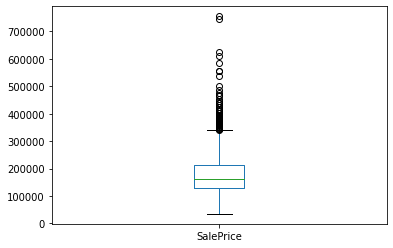

In [18]:
# Vsimnite si ako to volam cez plot
df.SalePrice.plot.box()

Casti boxplotu (box and whiskers plotu):
- Horna cast  vnutorneho stvorca je **Q1 kvartyl alebo 25% kvartyl** 
- Dolna cast je Q3 kvartyl 75% kvartyl (Q1 a Q3 vytvaraju takzvane **IQR alebo madzi kvartylove rozpatie**)
- Zelena ciara je prostredna hodnota alebo **median** (median nie je to iste co priemer)
- Cierne ciary su takvane **fuzy alebo whiskers** a ich hodnota je 1.5 násobok IQR.
- Vsetko mimo fuzov je povazovane za takzvaneho **outliera** cize hodnotu mimo prirodzeneho rozlozenia danej premennej

<AxesSubplot:>

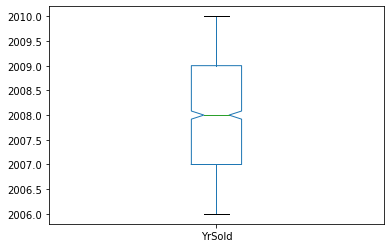

In [55]:
# hodnota notch=True nastavi zobrazi aj confidence interval na zaklade bootstrap algoritmu (len pre fajnsmekrov)
# hodnota whis vie nastavit hodnotu vzdialenosti fuzov defaultne je nastavena na 1.5 nasobok IQR 
df.YrSold.plot.box(notch=True, whis=2)

<AxesSubplot:title={'center':'YrSold'}, xlabel='MSZoning'>

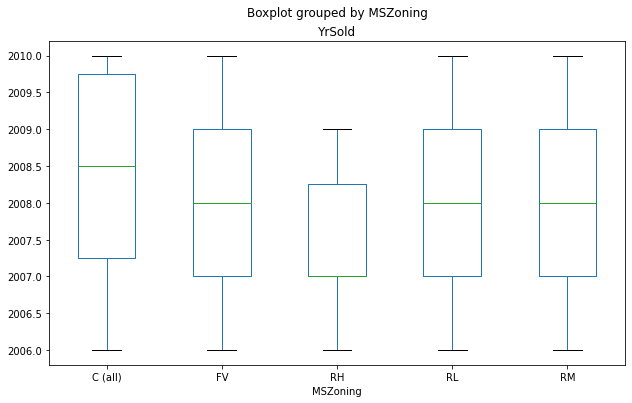

In [62]:
# Lets start the fun
# boxplot vieme volat nad cely db a vsetko specifikovat cez parametre
df.boxplot(column=["YrSold"], by="MSZoning", figsize=(10,6), grid=False)

<AxesSubplot:title={'center':'SalePrice'}, xlabel='MSZoning'>

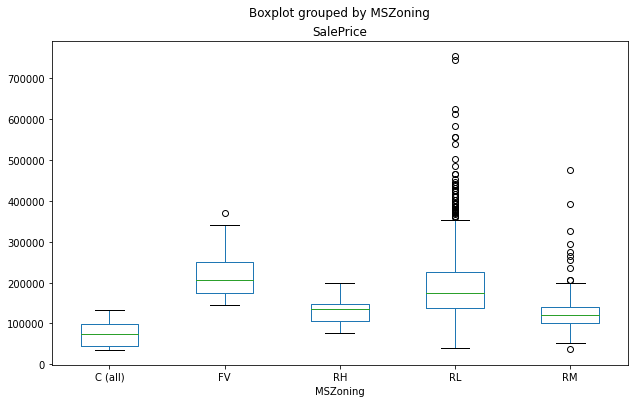

In [66]:
df.boxplot(column=["SalePrice"], by="MSZoning", figsize=(10,6), grid=False)

<AxesSubplot:>

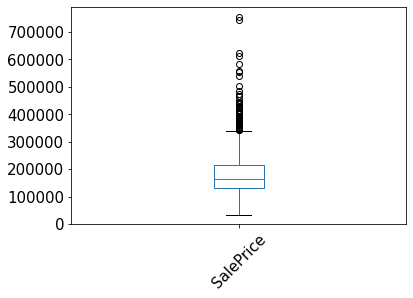

In [68]:
df.SalePrice.plot.box(rot=45, fontsize=15)

# Scatterplot

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

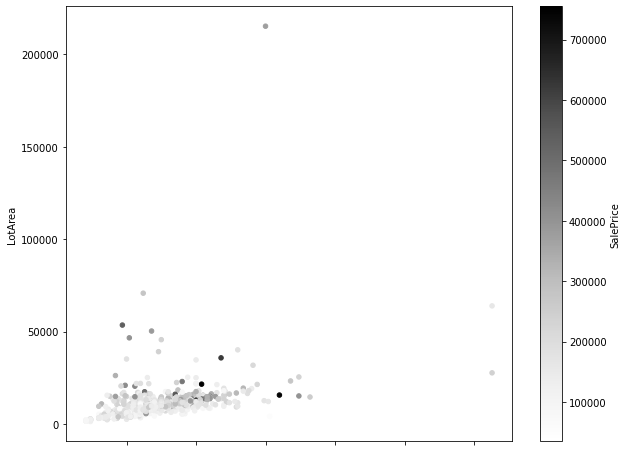

In [73]:
df.plot.scatter(x="LotFrontage", y="LotArea", c="SalePrice", figsize=(10,8))

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

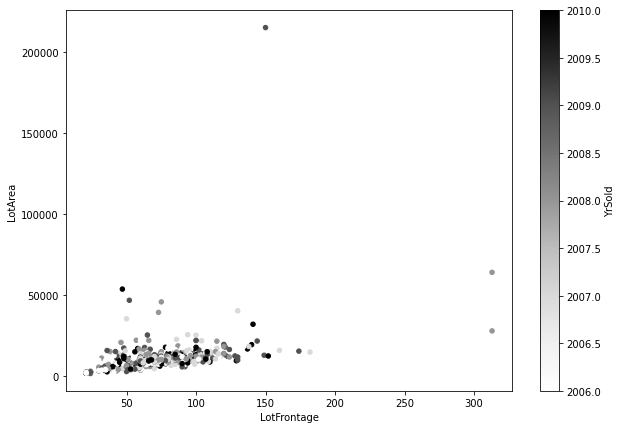

In [77]:
# Toto fixne bug s x labelom 
fig, ax = plt.subplots()
df.plot.scatter(x="LotFrontage", y="LotArea", c="YrSold", figsize=(10,7), ax=ax)

Ako naskalovat velkosti bublin na zaklade dat najdes [tu](https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range/281164)

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

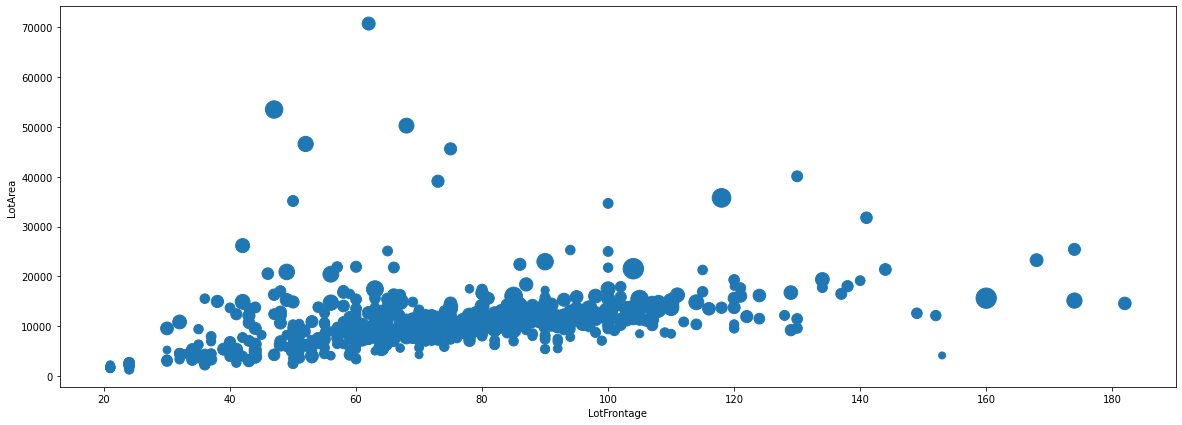

In [101]:
fig, ax = plt.subplots()
target_df = df.loc[(df.LotArea<100000)&(df.LotFrontage < 200),:]
scale_circles = (400 - 5) * ((target_df.SalePrice - target_df.SalePrice.min())/target_df.SalePrice.max()) + 40
target_df.plot.scatter(x="LotFrontage", y="LotArea", s=scale_circles, figsize=(20,7), ax=ax)